# Guide 3: Public Cloud Computing with Microsoft Azure

Public Cloud Computing is (**TODO** explain).  
It is somehow expensive (**TODO** explain).
You can communicate how (**TODO** explain). 

What is cloud computing

In this tutorial we are going to explain: a), b) , c)

We'll go over the basics of Microsoft Azure Storage, but we should point out that a *lot* of talented people have given tutorials, and we won't do any better than they have. 
*TODO Point out some resources and explain why they are good (add links).

# Table of Contents
* [Guide 3: Public Cloud Computing with Microsoft Azure](#Guide-2:-Public-Cloud-Computing-with-Microsoft-Azure)
    * [Cloud computing](#Cloud-storage-and-cloud-computing)
    * [Azure cloud computing basics](#Azure-Storage-Account-basics)
    * [Common Tasks in using Azure Cloud Computing services](#Common-Tasks-in-using-Azure-Storage-Account)
        * [Use API](#Paragraph-3)
        * [Request token](#Paragraph-3)
    * [Demo 1: Detect Face Features and Emotion](#Paragraph-3)
    * [Demo 2: Analyze Image](#Paragraph-3)
    * [Demo 3: Optical Character Recognition](#Paragraph-3)
    * [Demo 4: Speech Recognition](#Paragraph-3)
    * [Demo 5: Key Phrases](#Paragraph-3)
    * [Demo 6: Sentiment Analysis](#Paragraph-3)
    * [Demo 7: Bing Search](#Paragraph-3)

## Azure cloud computing basics
## Common Tasks in using Azure Cloud Computing services

https://www.soapui.org/learn/api/understanding-rest-headers-and-parameters.html

### Use API

### Request token

## Demo 1: Detect Face Features and Emotion
## Demo 2: Analyze Image
## Demo 3: Optical Character Recognition
## Demo 4: Speech Recognition
## Demo 5: Key Phrases
## Demo 6: Sentiment Analysis
## Demo 7: Bing Search

In [29]:
#from azure library import methods to use storage 
from azure.storage.blob import BlockBlobService

In [53]:
#set the storage account name 
azure_storage_account_name = 'cloudcomputingplayground' # add name

#set the storage account key
azure_storage_account_key = None

#set the container name (the foder with the files)
blob_container_name = 'cloudcomputingcontainer'

In [54]:
# create blob service object to access the files in the storage*
blob_service = BlockBlobService(azure_storage_account_name, azure_storage_account_key)

# create an object with a list a list of files associated with the container
blobs_container_file_list = blob_service.list_blobs(blob_container_name)

In [55]:
# set url format
blob_prefix = 'https://{0}.blob.core.windows.net/{1}/{2}'

# print the list of files
print("List of files in the container:")
for blob in blobs_container_file_list:
    print(blob_prefix.format(blob_service.account_name, blob_container_name, blob.name))

List of files in the container:
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/andrea_porelli.jpg
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/clinton.txt
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/cloud_providers_queries_gt.csv
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/debate.txt
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/eisenhower_for_president_1952_chunck_1.wav
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/eisenhower_for_president_1952_chunck_2.wav
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/eisenhower_for_president_1952_chunck_3.wav
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/eisenhower_for_president_1952_chunck_4.wav
https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/eisenhower_f

## Demo 1) Detect Face Features and Emotion (face/v1.0/detect)

_**Description:**_
Detect human faces in an image, return face rectangles, and optionally with faceIds, landmarks, and attributes. Attributes include age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure and noise. It can detects up to 64 faces for an image. Faces are ranked by face rectangle size from large to small. Face detector prefer frontal and near-frontal faces. There are cases that faces may not be detected, e.g. exceptionally large face angles (head-pose) or being occluded, or wrong image orientation.

_**Input/Output:**_
JPEG, PNG, GIF (the first frame), and BMP format are supported. The allowed image file size is from 1KB to 6MB.
Faces are detectable when its size is 36x36 to 4096x4096 pixels. If need to detect very small but clear faces, please try to enlarge the input image. Higher face image quality means better detection and recognition precision. Please consider high-quality faces: frontal, clear, and face size is 200x200 pixels (100 pixels between eyes) or bigger.

A succesfull response returns:
![face_detect_output](img/face_detect_output.PNG)

_**Documentation:**_
- Link to documentation ([FACE doc](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236))

### Show case

In [ ]:
#create container

###YOUR CODE HERE

#upload image

###YOUR CODE HERE

#display image

###YOUR CODE HERE

In [37]:
# import libraries to display image
import io
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# FACE API service Url (change based on the region*)
face_api = 'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect'
# Azure Cognitive Services Key for FACE API
key_1 = '620facc4717d4136b665e43a618c2911'

In [56]:
img_url = 'https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/leonid_andreev.png'    
img = Image(url=img_url, width=300, height=350)
display(img)

TypeError: 'module' object is not callable

In [40]:
headers = {'Content-Type': 'application/json', 
           'Ocp-Apim-Subscription-Key':key_1}

params = urllib.parse.urlencode({'returnFaceId' : 'true',
                                 'returnFaceLandmarks' : 'true',
                                 'returnFaceAttributes' : 'age,gender,emotion,smile,hair,exposure'})

query_string = '?{0}'.format(params)

url = face_api + query_string

body = '{\'url\':\'' + img_url + '\'}'

api_response = requests.post(url, headers=headers, data=body)

In [41]:
api_response

<Response [200]>

In [42]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

[]


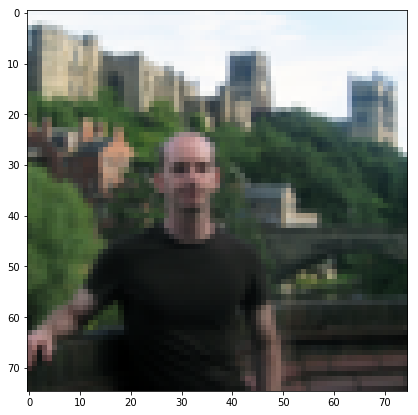

In [84]:
# set image's name to read
blob_name = 'steven_worthington.png'

# call method (i.e. get_blob_to_bytes to) read the images as byte array
blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

# set variable that store in memory image's bytes 
blob_bytes_in_memory = io.BytesIO(blob.content)

# read bytes and display image in the notebook
img_bytes = Image.open(blob_bytes_in_memory)
plt.figure(figsize=(7,7))
plt.imshow(img_bytes);

In [66]:
# import libraries to send HTTP requests and to craft URL
import requests
import urllib

In [81]:
headers = {'Content-Type': 'application/json', 
           'Ocp-Apim-Subscription-Key':key_1}

params = urllib.parse.urlencode({'returnFaceId' : 'true',
                                 'returnFaceLandmarks' : 'true',
                                 'returnFaceAttributes' : 'age,gender,emotion,smile,hair,exposure'})

query_string = '?{0}'.format(params)

url = face_api + query_string

body = '{\'url\':\'' + img_url + '\'}'

api_response = requests.post(url, headers=headers, data=blob.content)

In [73]:
# Set the request headers
headers = {'Content-Type': 'application/octer-stream', # or 'application/json' for remote stored image files
           'Ocp-Apim-Subscription-Key': key_1} # for locally stored

# Set request parameters converted to HTTP protocol
# these parameters tell the api I want to detect a face and a smile
params = urllib.parse.urlencode({'returnFaceId' : 'true',
                                 'returnFaceLandmarks' : 'true',
                                 'returnFaceAttributes' : 'age,gender,emotion,smile,hair,exposure'})


In [74]:
# compone query with chosen parameters and associaed URL
query = '?{0}'.format(params)
url = face_api + query

In [69]:
url

'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect?returnFaceId=true&returnFaceLandmarks=true&returnFaceAttributes=age%2Cgender'

In [82]:
# FACE api only returns 1 analysis at time
api_response = requests.post(url, 
                             headers=headers, 
                             data=blob.content) # use local memory (use content of blob converted to array)

In [83]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

{
  "error": {
    "code": "BadArgument",
    "message": "JSON parsing error."
  }
}


In [ ]:
# How ML helps finding faces?

##################################################################
#                                                                #
#                                                                #
#                                                                #
##################################################################

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(7, 7))
ax = plt.gca()

# Draw face rectangles
for i in res_json:
    fr = i['faceRectangle'] # get faceRectangle node per detected face in the image

    pc = 'red' # patch color
    if i['faceAttributes']['gender'] == 'male':
        pc = 'blue'

    ax.add_patch(
        patches.Rectangle(
            (fr['left'], fr['top']), fr['width'], fr['height'],
            fill=False, linewidth=4, color=pc)
    )
    
    ax.text(fr['left'], fr['top']+fr['height'], 
            'age:'+str(i['faceAttributes']['age']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
    

# ps = 5       # patch size
# pc = '#00FF00'   # patch color

# #Draw eye, nose, mouth
# for i in res_json:
#     fl = i['faceLandmarks']

#     # left eye
#     ax.add_patch(patches.Circle((fl['pupilLeft']['x'], fl['pupilLeft']['y']), ps, color=pc))

#     # right eye
#     ax.add_patch(patches.Circle((fl['pupilRight']['x'], fl['pupilRight']['y']), ps, color=pc))

#     # mouth
#     ax.add_patch(patches.Circle((fl['mouthLeft']['x'], fl['mouthLeft']['y']), ps, color=pc))
#     ax.add_patch(patches.Circle((fl['mouthRight']['x'], fl['mouthRight']['y']), ps, color=pc))

#     # nose
#     ax.add_patch(patches.Circle((fl['noseTip']['x'], fl['noseTip']['y']), ps, color=pc))

plt.imshow(img_bytes);

### Demo 2) Analyze Image (vision/v1.0/analyze)


_**Description:**_
- Blah,blah

_**Input/Output:**_
- This, and that

_**Documentation:**_
- Link to documentation (show the example on the user, then on the tutorial): https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa

**##TODO** add link in pythonic, format (code style)

In [ ]:
# import library to display images
from IPython.display import Image as ipImage, display

In [ ]:
#Process:
#1_Set_Cognitive_Service_Key(e.g. Face, Computer Vision, etc)
#2_Set_Service_API(eg. from FACE choose DETECT, from COMPUTER VISION choose ANALYZE)
#3_BlOB
#4_Display_Image

In [ ]:
# Azure Cognitive Services Key for COMPUTER VISION API
azure_key_computer_vision = 'b9fb47b349694da0bb42ffb5d687c7c0'

# Set API for Analyze service
analyze_api = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/analyze'

In [ ]:
# 
img_url = 'https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/vision1.jpeg'    
img = ipImage(url=img_url, width=450, height=450)
display(img)

In [ ]:
headers = {'Content-Type': 'application/json', 
           'Ocp-Apim-Subscription-Key':azure_key_computer_vision}

params = urllib.parse.urlencode({
    'visualFeatures': 'Categories,Tags,Description,Faces,ImageType,Color,Adult',
})

query_string = '?{0}'.format(params)

url = analyze_api + query_string

body = '{\'url\':\'' + img_url + '\'}'

api_response = requests.post(url, headers=headers, data=body)

In [ ]:
api_response

In [ ]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

**##TODO** 
 - find more interesting pictures
 - display nice output

### **_Demo 3) Optical Character Recognition (vision/v1.0/ocr)_**


_**Description:**_
- Blah,blah

_**Input/Output:**_
- This, and that

_**Documentation:**_
- Link to documentation (show the example on the user, then on the tutorial): 
https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc

**##TODO** add link in pythonic, format (code style)

In [ ]:
# Azure Cognitive Services Key for COMPUTER VISION API
# azure_key_computer_vision = 'b9fb47b349694da0bb42ffb5d687c7c0' (do not need this again)

# Set API for OCR service
ocr_api = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr'

In [ ]:
# load image file to process
# blob_name = 'ocr_iqss_1.png'
# blob = blob_service.get_blob_to_bytes(container_name, blob_name)
# image_file_in_mem = io.BytesIO(blob)
# img_bytes = Image.open(image_file_in_mem)

# set image's name to read
blob_name = 'ocr_iqss_1.png'

# call method (i.e. get_blob_to_bytes to) read the images as byte array
blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

# set variable that store in memory image's bytes 
blob_bytes_in_memory = io.BytesIO(blob.content)

# read bytes and display image in the notebook
img_bytes = Image.open(blob_bytes_in_memory)

In [ ]:
plt.figure(figsize=(12, 12))
ax = plt.gca()
# img_url = 'https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/ocr_iqss_1.png'
# img = ipImage(url=img_url, width=500, height=500)
# display(img)

plt.imshow(img_bytes)

In [ ]:
analyse_api = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr'

headers = {'Content-Type': 'application/octet-stream', 
           'Ocp-Apim-Subscription-Key':azure_key_computer_vision}

params = urllib.parse.urlencode({
    'language': 'unk',
    'detectOrientation': 'true',
})

query_string = '?{0}'.format(params)

url = ocr_api + query_string

api_response = requests.post(url, headers=headers, data=blob.content)

In [ ]:
url

In [ ]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
plt.figure(figsize=(12, 12))
ax = plt.gca()

text_angle = 0
try:
    text_angle = res_json['textAngle']
except:
    pass

# Draw OCR rectangles
for i in res_json['regions']:
    pl = i['lines']
    for k in pl:
        words = k['words']
        for l in words:
            bb = l['boundingBox']
            txt = l['text']
            
            bb = list(map(int, bb.split(',')))
            
            ax.add_patch(
                patches.Rectangle(
                    (bb[0], bb[1]), bb[2], bb[3], angle=text_angle,
                    fill=False, linewidth=4, color='#00FF00')
            )
            
            ax.text(bb[0], bb[1], txt, 
                    fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
            
plt.imshow(img_bytes)

### **_Demo 4) Speech Recognition (sts/v1.0/issueToken)_**


_**Description:**_
- Blah,blah

_**Input/Output:**_
- This, and that

_**Documentation:**_
- Link to documentation (show the example on the user, then on the tutorial): 
https://docs.microsoft.com/en-us/azure/cognitive-services/speech/getstarted/getstartedrest?tabs=Powershell

**##TODO** 
add link in pythonic, 
format (code style), 
add picture to explain how it works(if needed)

In [5]:
#make an example simple and build the more complex

azure_key_bing_speech = '5d14da803af54010ba390d560b203354'

In [6]:
from IPython.display import Audio, display
import requests
import urllib
import uuid
import json

In [ ]:
video_list = ['Eisenhower_1952.chunk0.wav','Eisenhower_1952.chunk1.wav'
             'Eisenhower_1952.chunk2.wav','Eisenhower_1952.chunk3.wav']

In [11]:
# load speech file to process
blob_name = 'Eisenhower_1952.chunk0.wav'
blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

wav_bytes = Audio(data=blob.content)
display(wav_bytes)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [18]:
uri_token = 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken'

headers = {'Content-Length': '0', 
           'Ocp-Apim-Subscription-Key': azure_key_bing_speech}

api_response = requests.post(uri_token, headers=headers)

access_token = str(api_response.content.decode('utf-8'))

In [19]:
blob.content[0:20]

b'RIFFD((\x00WAVEfmt \x10\x00\x00\x00'

In [23]:
# Service
# Call Speech to text service
url_stt_api = 'https://speech.platform.bing.com/recognize' # service address 

headers = {
           'Authorization': 'Bearer {0}'.format(access_token),
           'Content-type': 'audio/wav', 'codec': 'audio/pcm', 'samplerate': '16000'}

params = urllib.parse.urlencode({
    'scenarios': 'ulm',
    'appid': 'D4D52672-91D7-4C74-8AD8-42B1D98141A5', # dont change, it is fixed by design
    'locale': 'en-US', # speech in english
    'device.os': 'PC',
    'version': '3.0',
    'format': 'json', # return value in json
    'instanceid': str(uuid.uuid1()), # any guid
    'requestid': str(uuid.uuid1()),
})

api_response = requests.post(url_stt_api, headers=headers, params=params, data=blob.content)

In [24]:
api_response

<Response [200]>

In [25]:
res_json = json.loads(api_response.content.decode('utf-8'))
text = res_json['results'][0]['lexical']
res_json

{'version': '3.0',
 'header': {'status': 'success',
  'scenario': 'ulm',
  'name': 'for president for president president president',
  'lexical': 'for president for president president president',
  'properties': {'requestid': '99e4173f-0d7b-46cf-82d4-cb0750660c2d',
   'HIGHCONF': '1'}},
 'results': [{'scenario': 'ulm',
   'name': 'for president for president president president',
   'lexical': 'for president for president president president',
   'confidence': '0.7758604',
   'properties': {'HIGHCONF': '1'}}]}

In [ ]:
#build a speech recognition request

#try taking out token

#request a token
uri_api = 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken'
headers = {'Content-Length': '0', 'Ocp-Apim-Subscription-Key': speech_recognition_key}
response_api = requests.post(uri_api, headers=headers)
token = str(response_api.content.decode('utf-8'))



def speech_recognition_request(blob_name, blob_container_name, speech_recognition_key):
    
    #load audio file to process
    blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

    #send request to Speech Recognition service 
    url_api = 'https://speech.platform.bing.com/recognize'
    headers = {'Authorization': 'Bearer {0}'.format(token),
               'Content-type': 'audio/wav',
               'codec': 'audio/pcm',
               'samplerate': '16000'}
    params = urllib.parse.urlencode({
        'scenarios': 'ulm',
        'appid': 'D4D52672-91D7-4C74-8AD8-42B1D98141A5',
        'locale': 'en-US',
        'device.os': 'PC',
        'version': '3.0',
        'format': 'json',
        'instanceid': str(uuid.uuid1()),
        'requestid': str(uuid.uuid1())})
    response_api = requests.post(url_api, headers=headers, params=params, data=blob.content)

    #from response
    res_json = json.loads(response_api.content.decode('utf-8'))
    text = res_json['results'][0]['lexical']
    #confidence = res_json['results'][0]['confidence']
    
    return text #, confindence

In [ ]:
#retrive your keys
import pickle
with open('../keys/azure_services_keys.json', 'rb') as handle:
    azure_keys = pickle.load(handle)

In [ ]:
import time
start = time.time()
print("hello")

video_text = []
#text_confidence = []

for blob_name in video_list:
    text =speech_recognition_request(blob_name,'cloudcomputingcontainer',azure_keys['SPEECH_RECOGNITION']['API_KEY']) # confindence
    video_text.append(text)
    #text_confidence.append(confindence)

end = time.time()
print(end - start)

In [ ]:
azure_keys['SPEECH_RECOGNITION']['API_KEY'] == azure_key_bing_speech

In [ ]:
api_response 

In [ ]:
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

In [ ]:
res_json.keys()

In [ ]:
res_json['results'][0]['confidence']

In [ ]:
#import library to display notebook as HTML
import os
from IPython.core.display import HTML

#path to .ccs style script
cur_path = os.path.dirname(os.path.abspath("__file__"))
new_path = os.path.relpath('..\\..\\styles\\custom_styles_public_cloud_computing.css', cur_path)

#function to display notebook
def css():
    style = open(new_path, "r").read()
    return HTML(style)

In [ ]:
#run this cell to apply HTML style
css()

# ---

## Microsoft Cognitive Services APIs with Python

#### List of services shown in this tutorial:
    
- Caption Generation
    - Face API to detect facial characteristics
    - Computer Vision API to Analyze Image Contents
    - Computer Vision API for Optical Character Recognition

- Speech Recognition
    - Bing Speech Recognition API

- Text Analysis using Azure Machine Learning Studio Workshop
    - Key Phrases
    - Detect Language
    - Sentiment Analysis
    - Topic Detection


- **what are some research applications?**
---

#### What are you going to learn

- use cloud computing services to extract data from images and audio document
- use microsoft azure cloud computing services
- text analysis: predict and topic detection

---

#### Requirements

**TODO**

- list necessary dependencies (pip install azure)
- script to install dependecies
---